In [ ]:
import os
import cv2
import numpy as np
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, Rotate, RandomBrightnessContrast,
    GaussNoise, RandomResizedCrop
)
import shutil
from tqdm import tqdm

# Define the input and output directories
input_dir = '/kaggle/input/thermal-images-diseased-healthy-leaves-paddy/thermal images UL'  
output_dir = '/kaggle/working/augmented_thermal_images'

# Create augmentation pipeline
def get_augmentation():
    return Compose([
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        Rotate(limit=45, p=0.5),
        RandomBrightnessContrast(p=0.5),
        GaussNoise(p=0.3),
        RandomResizedCrop(height=224, width=224, scale=(0.8, 1.0), p=0.5)
    ])

# Function to create augmented images
def augment_images(image_path, save_dir, num_augmentations=5):
    # Read image
    image = cv2.imread(image_path)
    if image is None:
        return
    
    # Get file name
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)
    
    # Create augmentations
    augmentation = get_augmentation()
    
    # Save original image
    cv2.imwrite(os.path.join(save_dir, filename), image)
    
    # Create and save augmented images
    for i in range(num_augmentations):
        augmented = augmentation(image=image)['image']
        aug_filename = f"{name}_aug_{i}{ext}"
        cv2.imwrite(os.path.join(save_dir, aug_filename), augmented)

# Main processing
def process_dataset():
    # Create output directory
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)
    os.makedirs(output_dir)
    
    # Dictionary to store counts
    image_counts = {}
    
    # Process each class folder
    for class_name in ['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']:
        # Create class directory in output
        class_output_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_output_dir)
        
        # Get input class directory
        class_input_dir = os.path.join(input_dir, class_name)
        
        # Process images in class directory
        image_files = [f for f in os.listdir(class_input_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        print(f"Processing {class_name}...")
        for image_file in tqdm(image_files):
            image_path = os.path.join(class_input_dir, image_file)
            augment_images(image_path, class_output_dir)
        
        # Count augmented images
        augmented_count = len(os.listdir(class_output_dir))
        image_counts[class_name] = augmented_count
        print(f"{class_name}: {augmented_count} images")
    
    return image_counts

# Run the processing
if __name__ == "__main__":
    print("Starting augmentation process...")
    final_counts = process_dataset()
    
    print("\nFinal image counts after augmentation:")
    for class_name, count in final_counts.items():
        print(f"{class_name}: {count} images")

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Starting augmentation process...
Processing BLB...


100%|██████████| 220/220 [00:09<00:00, 23.36it/s]


BLB: 1320 images
Processing Blast...


100%|██████████| 67/67 [00:02<00:00, 23.91it/s]


Blast: 402 images
Processing healthy...


100%|██████████| 93/93 [00:03<00:00, 25.93it/s]


healthy: 558 images
Processing hispa...


100%|██████████| 142/142 [00:05<00:00, 23.82it/s]


hispa: 852 images
Processing leaf folder...


100%|██████████| 34/34 [00:01<00:00, 24.11it/s]


leaf folder: 204 images
Processing leaf spot...


100%|██████████| 80/80 [00:03<00:00, 24.96it/s]

leaf spot: 480 images

Final image counts after augmentation:
BLB: 1320 images
Blast: 402 images
healthy: 558 images
hispa: 852 images
leaf folder: 204 images
leaf spot: 480 images


Number of devices: 2
Found 3816 files belonging to 6 classes.
Using 3053 files for training.
Found 3816 files belonging to 6 classes.
Using 763 files for validation.
Train batch shapes: (64, 224, 224, 3) (64, 6)
Validation batch shapes: (64, 224, 224, 3) (64, 6)
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,6

 Total params: 15,113,286 (57.65 MB)

 Trainable params: 13,376,262 (51.03 MB)

 Non-trainable params: 1,737,024 (6.63 MB)

None
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 663ms/step - accuracy: 0.1564 - loss: 2.3305 - val_accuracy: 0.3099 - val_loss: 1.8246
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 542ms/step - accuracy: 0.2991 - loss: 1.8327 - val_accuracy: 0.4219 - val_loss: 1.4830
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 552ms/step - accuracy: 0.3864 - loss: 1.5556 - val_accuracy: 0.6823 - val_loss: 0.9765
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 565ms/step - accuracy: 0.5212 - loss: 1.2784 - val_accuracy: 0.7135 - val_loss: 0.9071
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 551ms/step - accuracy: 0.6046 - loss: 1.0747 - val_accuracy: 0.7552 - val_loss: 0.7225
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 27s 531ms/step - accuracy: 0.6912 - loss: 0.9175 - val_accuracy: 0.7891 - val_loss: 0.5899
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 27s 536ms/step - accuracy: 0.7255 - loss: 0.7858 - val_accuracy: 0.8203 - val_loss: 0.5433
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 28s 555ms/step - accuracy: 0.7788 - loss: 0.7031 - val

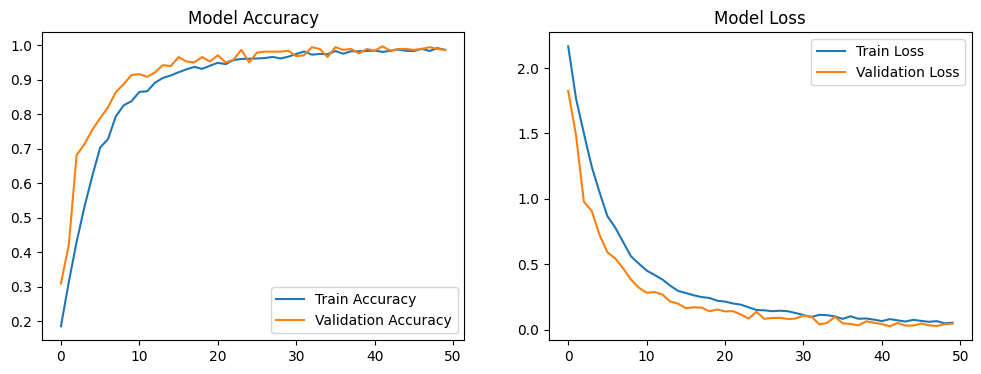

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Set up distributed training strategy
strategy = tf.distribute.MirroredStrategy()
print(f"Number of devices: {strategy.num_replicas_in_sync}")

# Set dataset directory
dataset_dir = "/kaggle/working/augmented_thermal_images"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32 * strategy.num_replicas_in_sync  

# Create tf.data.Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42,
    label_mode='categorical'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42,
    label_mode='categorical'
)

# Disable auto-sharding
options = tf.data.Options()
options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.OFF
train_ds = train_ds.with_options(options)
val_ds = val_ds.with_options(options)

# Data augmentation
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomContrast(0.2),
])

# Preprocess and augment the dataset
train_ds = train_ds.map(
    lambda x, y: (augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# Debug: Inspect dataset shapes
for images, labels in train_ds.take(1):
    print("Train batch shapes:", images.shape, labels.shape)

for images, labels in val_ds.take(1):
    print("Validation batch shapes:", images.shape, labels.shape)

# Create model within strategy scope
with strategy.scope():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        if 'block5' in layer.name or 'block4' in layer.name:
            layer.trainable = True
        else:
            layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.3)(x)  
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = Dropout(0.3)(x)  
    output = Dense(6, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    model.build(input_shape=(None, 224, 224, 3))
    print(model.summary())

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ModelCheckpoint("best_modell.keras", monitor='val_accuracy', save_best_only=True, mode='max')
]

# Train model
history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=callbacks
)

# Evaluation
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")

# Save model
model.save("thermal_disease_vgg1.keras")

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

# accuracy 0.9896


In [4]:
model.save("thermal_disease_vgg1.keras")